In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/ML Data/store-sales-time-series-forecasting/train.csv', parse_dates=['date'])
test_df = pd.read_csv('/content/drive/MyDrive/ML Data/store-sales-time-series-forecasting/test.csv', parse_dates=['date'])
stores_df = pd.read_csv('/content/drive/MyDrive/ML Data/store-sales-time-series-forecasting/stores.csv')
holidays_df = pd.read_csv('/content/drive/MyDrive/ML Data/store-sales-time-series-forecasting/holidays_events.csv', parse_dates=['date'])
oil_df = pd.read_csv('/content/drive/MyDrive/ML Data/store-sales-time-series-forecasting/oil.csv', parse_dates=['date'])
transactions_df = pd.read_csv('/content/drive/MyDrive/ML Data/store-sales-time-series-forecasting/transactions.csv', parse_dates=['date'])

In [ ]:
# Συνάρτηση κατανόησης και εξερεύνηση δεδομένων
def display_info(dataframe, df_name):
  print("\n" + df_name + " Head \n")
  display(dataframe.head())

  print("\n" + df_name + " Info \n")
  display(dataframe.info())

  print("\n" + df_name + " Describe \n")
  display(dataframe.describe().T)

  print("\n" + df_name + " Missing Values \n")
  display(dataframe.isnull().sum())


In [ ]:
display_info(train_df, "Training Set")


Training Set Head 



,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0



Training Set Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


None


Training Set Describe 



,count,mean,min,25%,50%,75%,max,std
id,3000888.0,1500443.5,0.0,750221.75,1500443.5,2250665.25,3000887.0,866281.891642
date,3000888,2015-04-24 08:27:04.703088384,2013-01-01 00:00:00,2014-02-26 18:00:00,2015-04-24 12:00:00,2016-06-19 06:00:00,2017-08-15 00:00:00,NaN
store_nbr,3000888.0,27.5,1.0,14.0,27.5,41.0,54.0,15.585787
sales,3000888.0,357.775749,0.0,0.0,11.0,195.84725,124717.0,1101.997721
onpromotion,3000888.0,2.60277,0.0,0.0,0.0,0.0,741.0,12.218882



Training Set Missing Values 



,0
id,0
date,0
store_nbr,0
family,0
sales,0
onpromotion,0


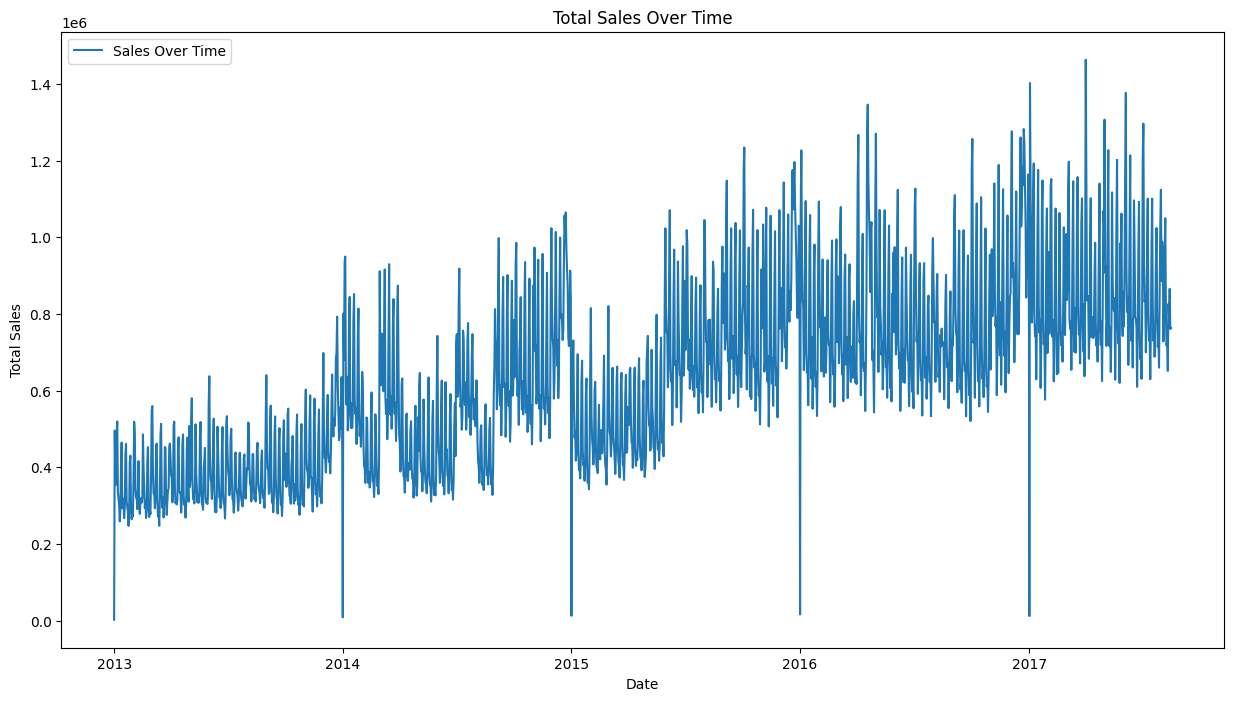

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ομαδοποίησε τις πωλήσεις ανά ημερομηνία
sales_per_date = train_df.groupby('date')['sales'].sum()

# Κάνε plot
plt.figure(figsize=(15, 8))
plt.plot(sales_per_date, label='Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales Over Time')
plt.legend()
plt.show()

# Analyzing Supplementry data

In [ ]:
# Oil Dataframe
display_info(oil_df, "Oil Dataframe")


Oil Dataframe Head 



,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20



Oil Dataframe Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


None


Oil Dataframe Describe 



,count,mean,min,25%,50%,75%,max,std
date,1218,2015-05-02 12:00:00,2013-01-01 00:00:00,2014-03-03 06:00:00,2015-05-02 12:00:00,2016-06-30 18:00:00,2017-08-31 00:00:00,NaN
dcoilwtico,1175.0,67.714366,26.19,46.405,53.19,95.66,110.62,25.630476



Oil Dataframe Missing Values 



,0
date,0
dcoilwtico,43


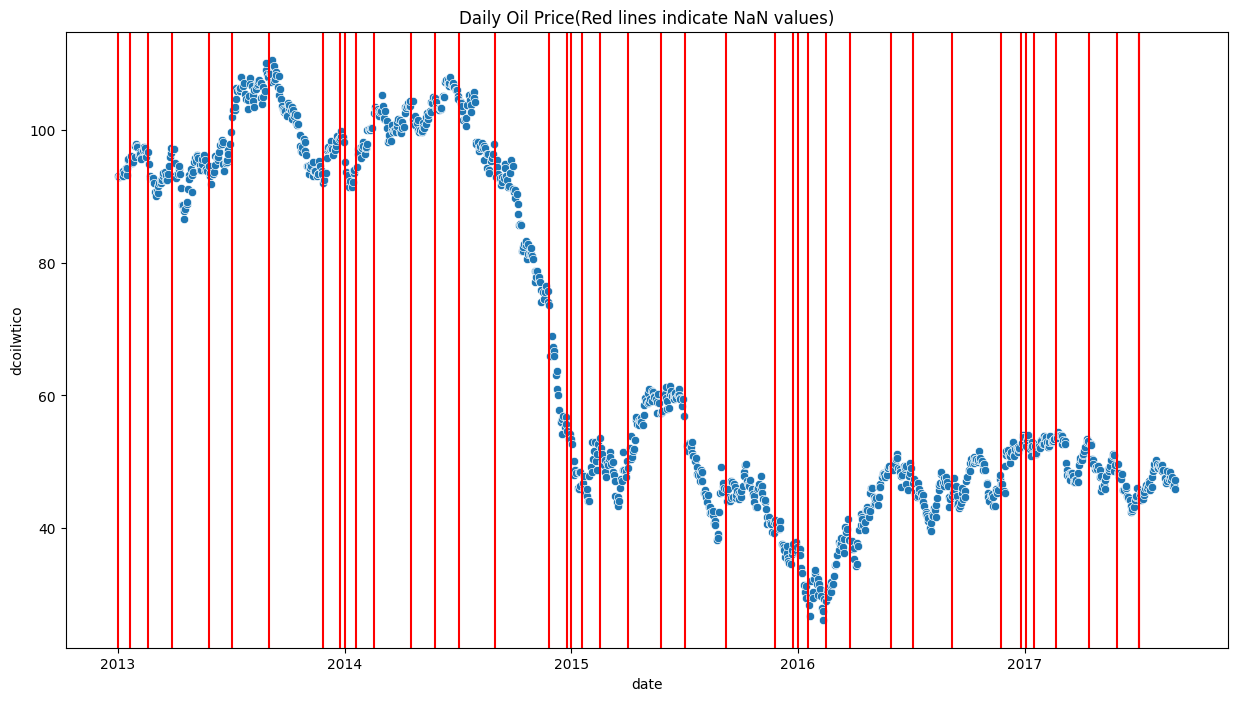

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.scatterplot(data = oil_df, x = 'date', y = 'dcoilwtico')
ax.set_title("Daily Oil Price(Red lines indicate NaN values)")


for timestamp in oil_df[oil_df.dcoilwtico.isna()].date :
    plt.axvline(x = timestamp.to_pydatetime(), color = 'r');

In [ ]:
# Stores Dataframe
display_info(stores_df, "Stores Dataframe")


Stores Dataframe Head 



,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4



Stores Dataframe Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


None


Stores Dataframe Describe 



,count,mean,std,min,25%,50%,75%,max
store_nbr,54.0,27.500000,15.732133,1.0,14.25,27.5,40.75,54.0
cluster,54.0,8.481481,4.693395,1.0,4.00,8.5,13.00,17.0



Stores Dataframe Missing Values 



,0
store_nbr,0
city,0
state,0
type,0
cluster,0


In [ ]:
# Store Transactions
display_info(transactions_df, "Store Transactions")


Store Transactions Head 



,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922



Store Transactions Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


None


Store Transactions Describe 



,count,mean,min,25%,50%,75%,max,std
date,83488,2015-05-20 16:07:40.866232064,2013-01-01 00:00:00,2014-03-27 00:00:00,2015-06-08 00:00:00,2016-07-14 06:00:00,2017-08-15 00:00:00,NaN
store_nbr,83488.0,26.939237,1.0,13.0,27.0,40.0,54.0,15.608204
transactions,83488.0,1694.602158,5.0,1046.0,1393.0,2079.0,8359.0,963.286644



Store Transactions Missing Values 



,0
date,0
store_nbr,0
transactions,0


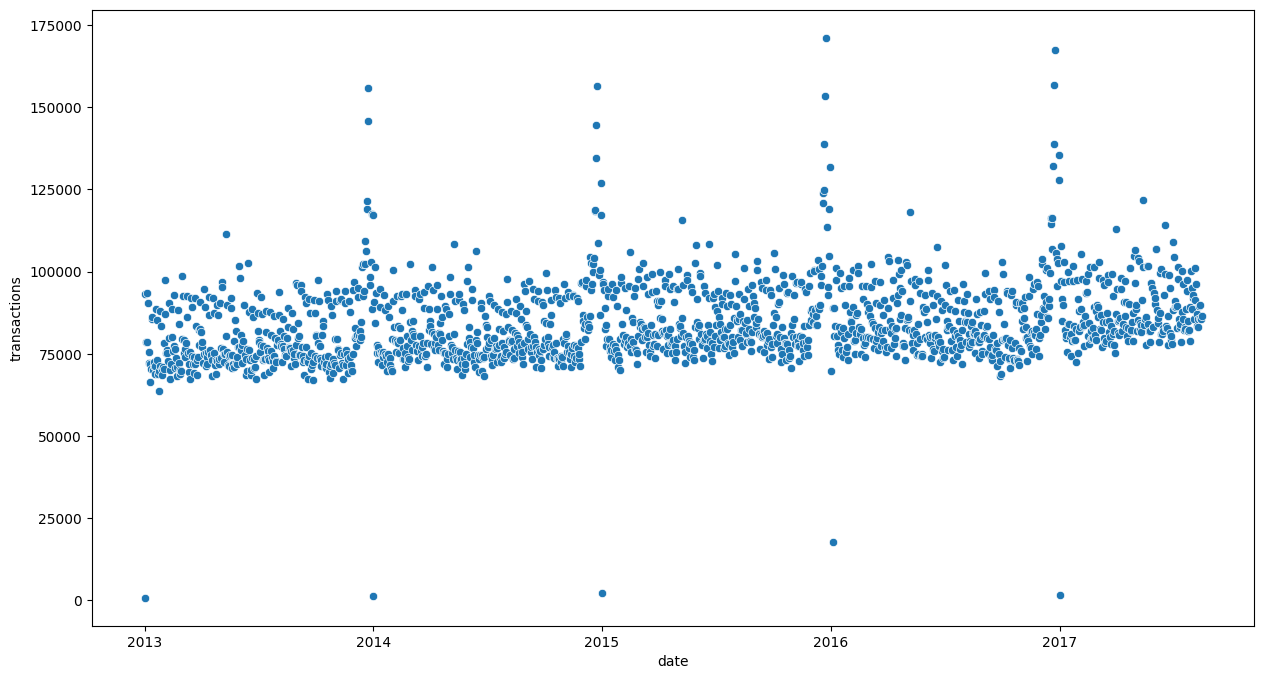

In [ ]:
plt.figure(figsize = (15,8))
new_df = transactions_df.groupby(['date'])['transactions'].sum().reset_index()

sns.scatterplot(data = new_df, x = 'date', y = 'transactions');

In [ ]:
# Holiday Events Dataframe
display_info(holidays_df, "Holidays Events Dataframe")


Holidays Events Dataframe Head 



,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False



Holidays Events Dataframe Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


None


Holidays Events Dataframe Describe 



,count,mean,min,25%,50%,75%,max
date,350,2015-04-24 00:45:15.428571392,2012-03-02 00:00:00,2013-12-23 06:00:00,2015-06-08 00:00:00,2016-07-03 00:00:00,2017-12-26 00:00:00



Holidays Events Dataframe Missing Values 



,0
date,0
type,0
locale,0
locale_name,0
description,0
transferred,0


# Επεξεργασία του Oil Dataframe
## 1. Ξαφνική πτώση των τιμών από το 2014 έως το 2015
Εξερεύνηση για το αν υπάρχει συσχέτιση με τις πωλήσεις


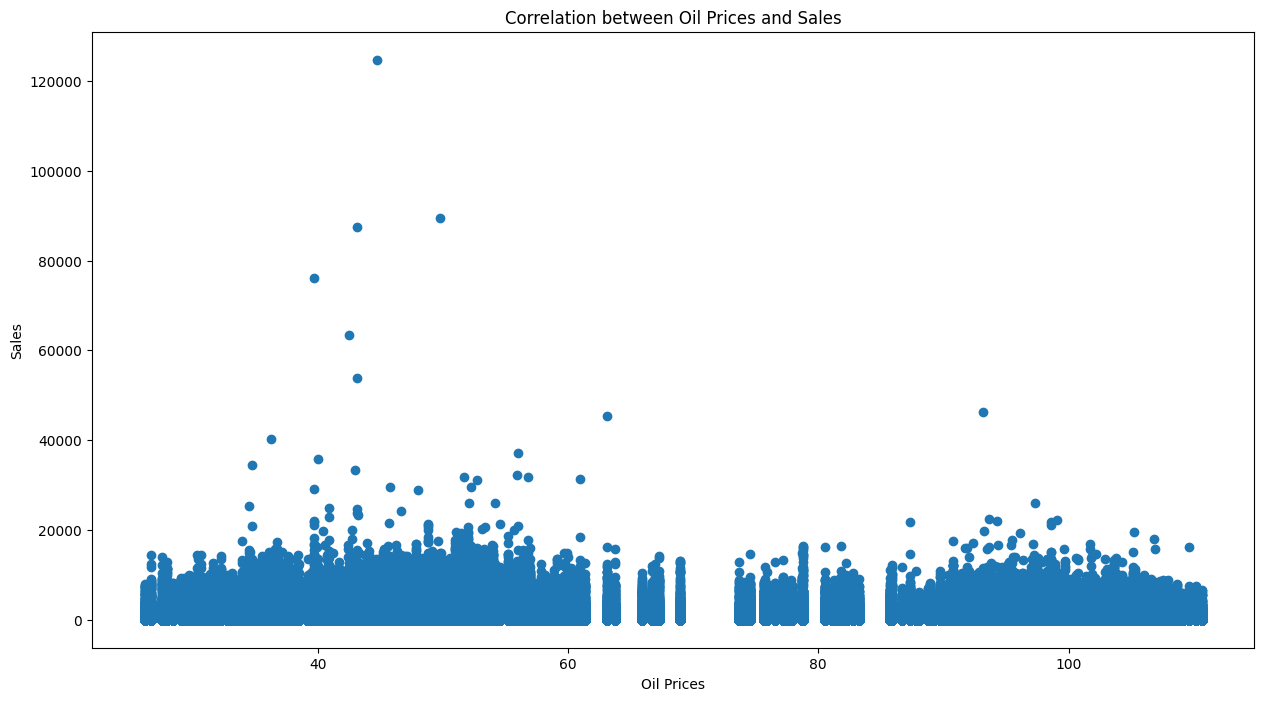

In [ ]:
# Merge oil_df with train.df
merged_df = train_df.merge(oil_df, on='date', how='left')

# plot
plt.figure(figsize = (15,8))
plt.scatter(merged_df['dcoilwtico'], merged_df['sales'])
plt.xlabel('Oil Prices')
plt.ylabel('Sales')
plt.title('Correlation between Oil Prices and Sales')
plt.show()

##2. Τα δεδομένα μπορεί να έχουν κυκλική συμπεριφορά
### Ανάλυση εποχικότητας (seasonality)

In [ ]:
# Handling Missing Values First
oil_df['dcoilwtico'] = oil_df['dcoilwtico'].interpolate(method='linear')
print(oil_df['dcoilwtico'].isna().sum())

# Εντοπισμός θέσης του missing value, αν υπάρχει
print(oil_df[oil_df['dcoilwtico'].isna()])

oil_df['dcoilwtico'] = oil_df['dcoilwtico'].fillna(method='ffill').fillna(method='bfill') # Επειδη το ενα missing value είναι στην αρχη, backward-fill
print(oil_df['dcoilwtico'].isna().sum()) # Πρέπει να επιστρέφει 0

1
        date  dcoilwtico
0 2013-01-01         NaN
0


<ipython-input-13-9b93c700176b>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  oil_df['dcoilwtico'] = oil_df['dcoilwtico'].fillna(method='ffill').fillna(method='bfill') # Επειδη το ενα missing value είναι στην αρχη, backward-fill


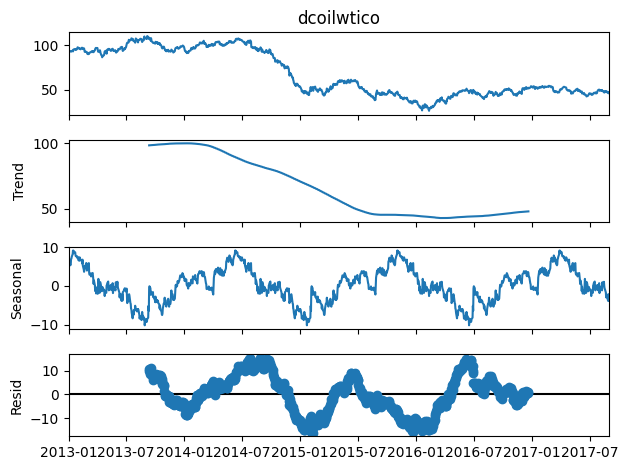

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


oil_prices = oil_df.set_index('date')['dcoilwtico']
decomposition = seasonal_decompose(oil_prices, model='additive', period=365)
decomposition.plot()
plt.show()

Παρατηρώ οτι οι τιμές πετρελαίου ακολουθούν κάποιο συγκεκριμένο μοτίβο ετήσιο. Θα δοκιμάσω να κάνω οπτικοποίηση της Ετήσιας Εποχικότητας
για να επιβεβαιώσω την εποχικότητα και να δω καλύτερα το μοτίβο

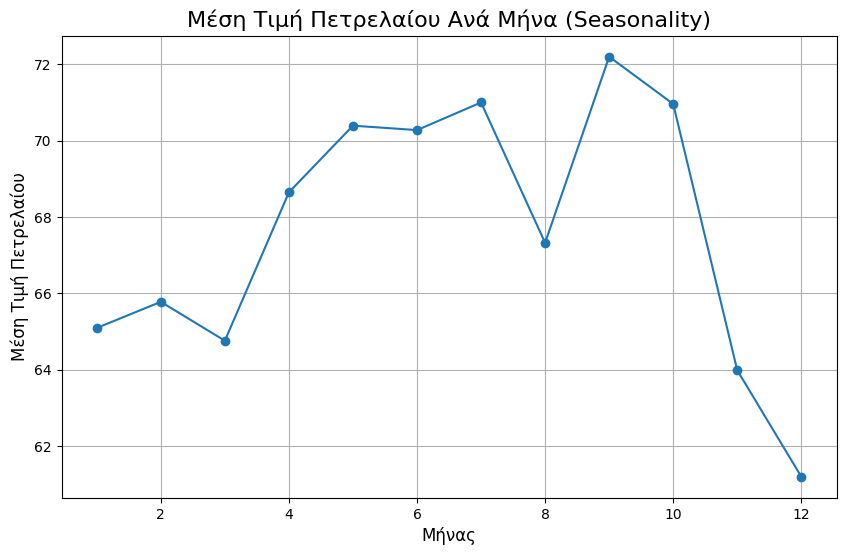

In [ ]:
oil_df['month'] = oil_df['date'].dt.month
monthly_avg = oil_df.groupby('month')['dcoilwtico'].mean()

plt.figure(figsize=(10, 6))
plt.plot(monthly_avg, marker='o')
plt.title('Μέση Τιμή Πετρελαίου Ανά Μήνα (Seasonality)', fontsize=16)
plt.xlabel('Μήνας', fontsize=12)
plt.ylabel('Μέση Τιμή Πετρελαίου', fontsize=12)
plt.grid()
plt.show()

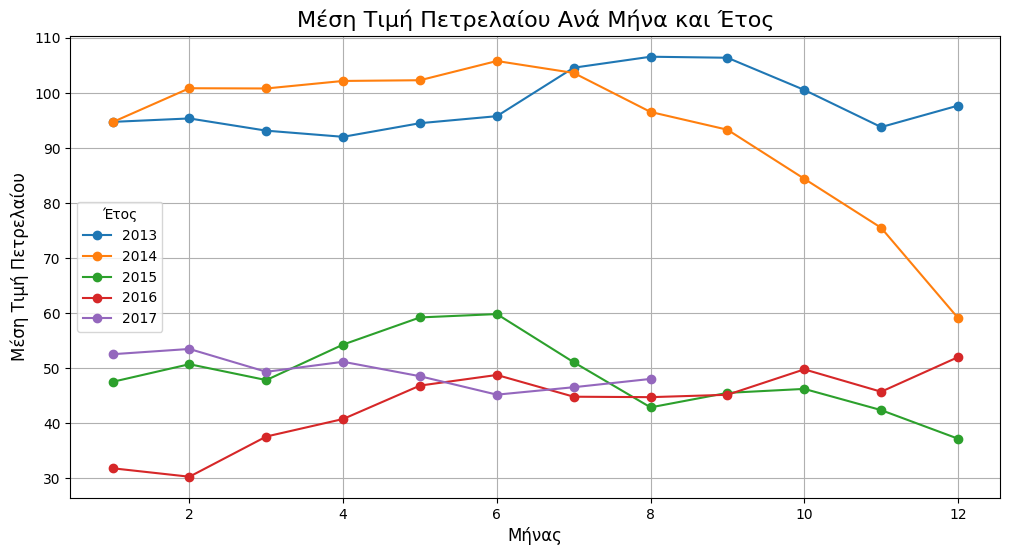

In [ ]:
oil_df['year'] = oil_df['date'].dt.year
oil_df['month'] = oil_df['date'].dt.month

monthly_avg_by_year = oil_df.groupby(['year', 'month'])['dcoilwtico'].mean().unstack(level=0)

plt.figure(figsize=(12, 6))
monthly_avg_by_year.plot(ax=plt.gca(), marker='o')
plt.title('Μέση Τιμή Πετρελαίου Ανά Μήνα και Έτος', fontsize=16)
plt.xlabel('Μήνας', fontsize=12)
plt.ylabel('Μέση Τιμή Πετρελαίου', fontsize=12)
plt.legend(title='Έτος')
plt.grid()
plt.show()

Μετά απο αυτήν την ανάλυση όσο αναφορά το oil_df τα συμπεράσματα που έβγαλα είναι τα εξής:
1. Οι πωλήσεις δεν επηρέασαν τις τιμές πετρελαίου το έτος 2014-2015 που υπήρχε απότομη μείωση
2. Υπάρχει εποχικότητα καθώς οι τιμές πετρελαίου αυξάνονται μέχρι τον 8ο-9ο μήνα και μετά μειώνονται

# Όσο αναφορά το transactions_df:
Φαίνεται πως οι συναλλαγές αυξάνονται προς το τέλος της χρονιάς σε όλα τα έτη, ενώ καθ' όλη τη διάρκεια της χρονιάς παραμένουν σχετικά σταθερές. Επίσης, είναι λογικό οτι τη πρωτοχρονιά οι συναλλαγές είναι 0 καθώς τα μαγαζιά παραμένουν κλειστά.
## Οπτικοποίηση των Μοτίβων

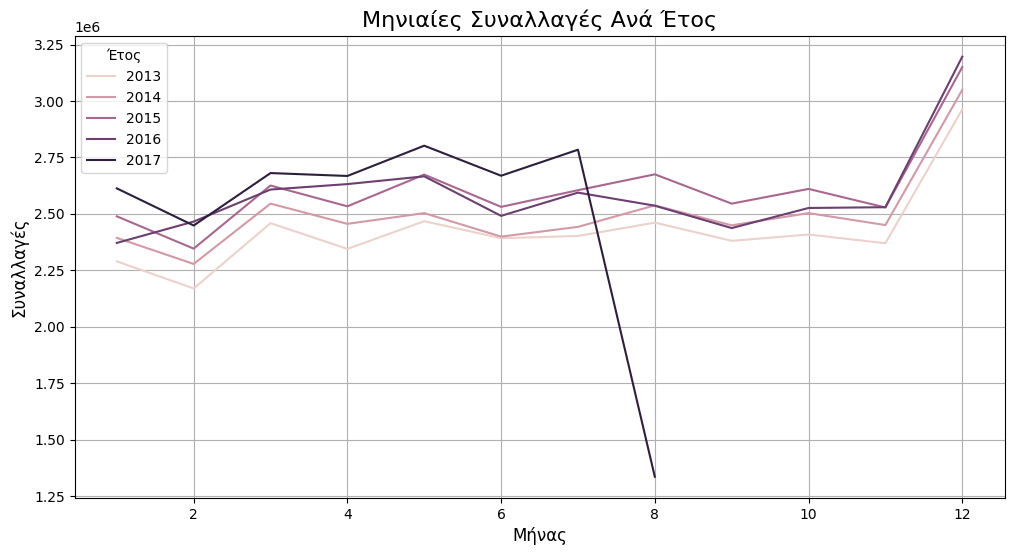

In [ ]:
transactions_df['month'] = transactions_df['date'].dt.month
transactions_df['year'] = transactions_df['date'].dt.year

monthly_transactions = transactions_df.groupby(['year', 'month'])['transactions'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='transactions', hue='year', data=monthly_transactions)
plt.title('Μηνιαίες Συναλλαγές Ανά Έτος', fontsize=16)
plt.xlabel('Μήνας', fontsize=12)
plt.ylabel('Συναλλαγές', fontsize=12)
plt.legend(title='Έτος')
plt.grid()
plt.show()

Από την οπτικοποίηση των μοτίβων βλέπω οτι οι πωλήσεις κρατάνε ένα σταθερό μοτίβο όλα τα χρόνια με εξαίρεση το τελευταίο έτος (2017) όπου από τον 7ο μήνα υπάρχει απότομη μείωση. Επίσης τα δεδομένα σταματάνε στον 8ο μήνα του 2017 όποτε μπορεί γι αυτό να υπάρχει μείωση.
## Οπτικοποίηση Πωλήσεων το 2017

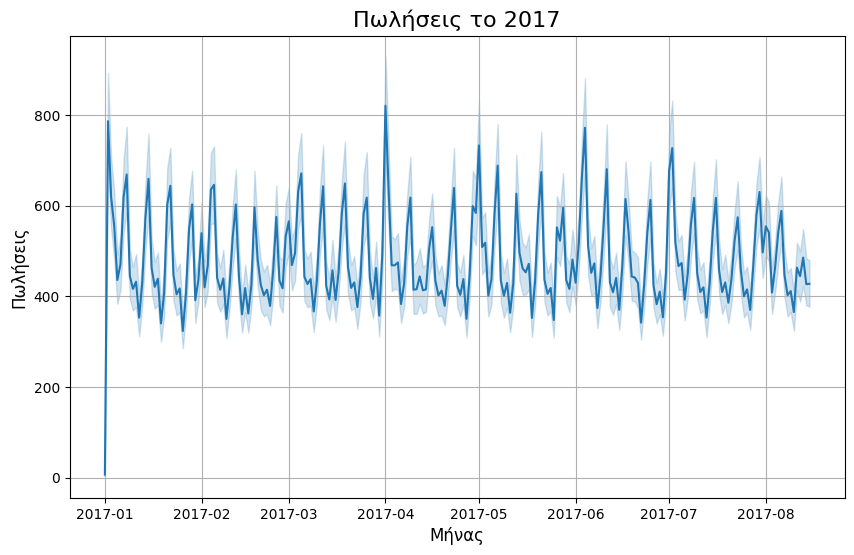

In [ ]:
sales_2017 = train_df[train_df['date'].dt.year == 2017]
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='sales', data=sales_2017)
plt.title('Πωλήσεις το 2017', fontsize=16)
plt.xlabel('Μήνας', fontsize=12)
plt.ylabel('Πωλήσεις', fontsize=12)
plt.grid()
plt.show()

Οι πωλήσεις το 2017 δεν έχουν πτώση ακόμα και τον 7ο και 8ο μήνα, αυτό μπορεί να σγμαίνει ότι η μείωση στις συναλλαγές αφορά την έλλειψη δεδομένων και όχι κάποια πραγματική πτώση.

In [ ]:
### Analyzing holidays data

# holiday_events.date.min() # min date : 2012-03-02
# holiday_events.date.max() # max date : 2017-12-26

print('Start date for holiay_events : ', holidays_df.date.min())
print('End date for holiay_events : ', holidays_df.date.max())
print('----------------------------------------')

# Printing holidays in each year...
for year in range(2012, 2018):
    print(f'Number of holidays in {year} are : ', len(holidays_df[holidays_df['date'].dt.year == year]))

print('----------------------------------------')

Start date for holiay_events :  2012-03-02 00:00:00
End date for holiay_events :  2017-12-26 00:00:00
----------------------------------------
Number of holidays in 2012 are :  41
Number of holidays in 2013 are :  51
Number of holidays in 2014 are :  67
Number of holidays in 2015 are :  52
Number of holidays in 2016 are :  86
Number of holidays in 2017 are :  53
----------------------------------------


In [ ]:
train_df['is_holiday'] = train_df['date'].isin(holidays_df['date'])
train_df.head(10)
holiday_sales = train_df.groupby('is_holiday')['sales'].mean()
print(holiday_sales)

is_holiday
False    352.159181
True     389.692123
Name: sales, dtype: float64


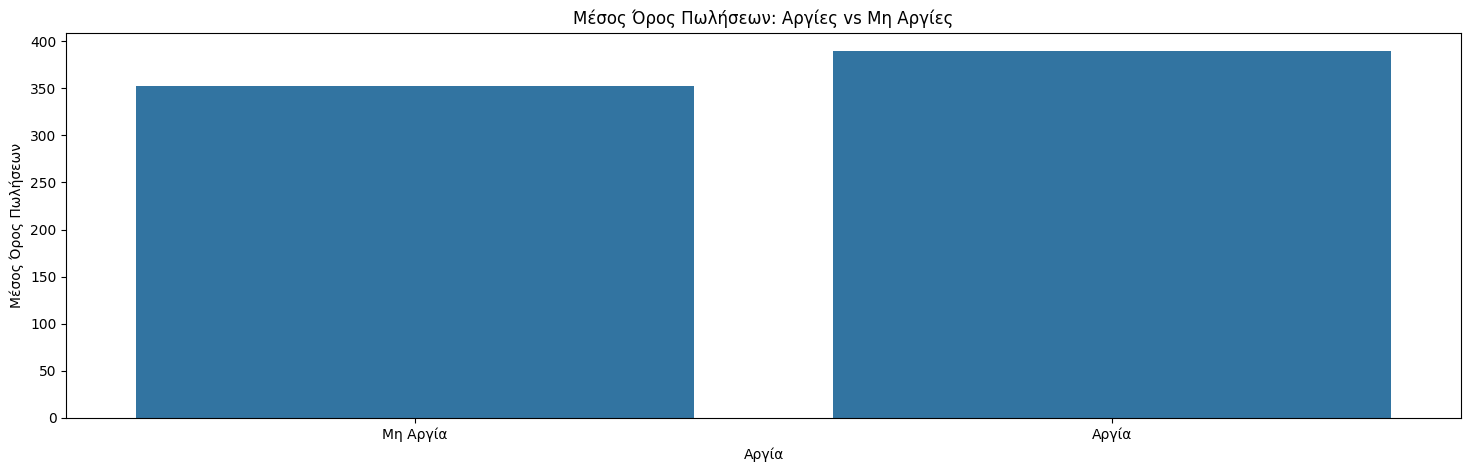

In [ ]:
plt.figure(figsize=(18, 5))
sns.barplot(x=holiday_sales.index, y=holiday_sales.values)
plt.title('Μέσος Όρος Πωλήσεων: Αργίες vs Μη Αργίες')
plt.xlabel('Αργία')
plt.ylabel('Μέσος Όρος Πωλήσεων')
plt.xticks([0, 1], ['Μη Αργία', 'Αργία'])
plt.show()

# Προετοιμασία των Δεδομένων


In [ ]:
# Θα δουλέψουμε σε αντίγραφο για να μην τροποποιήσουμε το πρωτότυπο
train_clean = train_df.copy()
train_clean.head()

,id,date,store_nbr,family,sales,onpromotion,is_holiday
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,True
1,1,2013-01-01,1,BABY CARE,0.0,0,True
2,2,2013-01-01,1,BEAUTY,0.0,0,True
3,3,2013-01-01,1,BEVERAGES,0.0,0,True
4,4,2013-01-01,1,BOOKS,0.0,0,True


# Δημιουργία Χαρακτηριστικών (Feature Engineering)

In [ ]:
# One-Hot-Encoding
train_clean = pd.get_dummies(train_clean, columns=['family'])

# Εξαγωγή του μήνα από την ημερομηνία
train_clean['month'] = train_clean['date'].dt.month

# Εξαγωγή της ημέρας της εβδομάδας (0=Δευτέρα, 6=Κυριακή)
train_clean['day_of_week'] = train_clean['date'].dt.dayofweek

# Εξαγωγή της ημέρας του μήνα
train_clean['day_of_month'] = train_clean['date'].dt.day

# Δημιουργία μεταβλητής για το αν είναι Σαββατοκύριακο (1=Σάββατο ή Κυριακή, αλλιώς 0)
train_clean['is_weekend'] = train_clean['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Lag Features

In [ ]:
train_clean['lag_1'] = train_clean['sales'].shift(1) # Lag for 1 day before
train_clean['lag_2'] = train_clean['sales'].shift(2)
train_clean['lag_3'] = train_clean['sales'].shift(3)
train_clean['lag_4'] = train_clean['sales'].shift(4)
train_clean['lag_5'] = train_clean['sales'].shift(5)
train_clean['lag_6'] = train_clean['sales'].shift(6)
train_clean['lag_7'] = train_clean['sales'].shift(7)

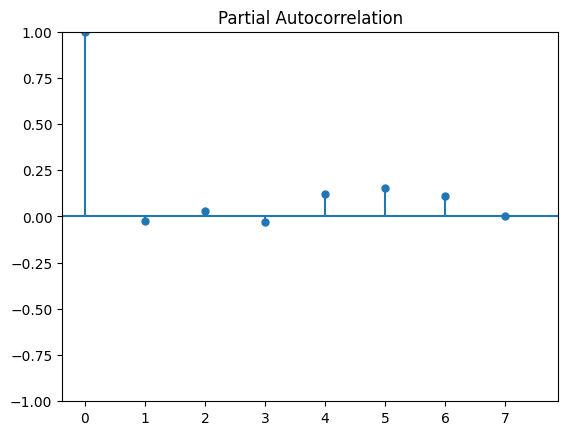

In [ ]:
import statsmodels.api as sm

sm.graphics.tsa.plot_pacf(train_clean.sales, lags=7)
plt.show()

In [ ]:
train_clean.drop(columns=['lag_1', 'lag_2', 'lag_3', 'lag_7'], inplace=True)

# Επεξεργασία Test Set

In [ ]:
# Θα δουλέψουμε σε αντίγραφο για να μην τροποποιήσουμε το πρωτότυπο
test_clean = test_df.copy()
test_clean.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [ ]:
test_clean['is_holiday'] = test_clean['date'].isin(holidays_df['date'])

# One-Hot-Encoding
test_clean = pd.get_dummies(test_clean, columns=['family'])

# Εξαγωγή του μήνα από την ημερομηνία
test_clean['month'] = test_clean['date'].dt.month

# Εξαγωγή της ημέρας της εβδομάδας (0=Δευτέρα, 6=Κυριακή)
test_clean['day_of_week'] = test_clean['date'].dt.dayofweek

# Εξαγωγή της ημέρας του μήνα
test_clean['day_of_month'] = test_clean['date'].dt.day

# Δημιουργία μεταβλητής για το αν είναι Σαββατοκύριακο (1=Σάββατο ή Κυριακή, αλλιώς 0)
test_clean['is_weekend'] = test_clean['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)


In [ ]:
test_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   id                                 28512 non-null  int64         
 1   date                               28512 non-null  datetime64[ns]
 2   store_nbr                          28512 non-null  int64         
 3   onpromotion                        28512 non-null  int64         
 4   is_holiday                         28512 non-null  bool          
 5   family_AUTOMOTIVE                  28512 non-null  bool          
 6   family_BABY CARE                   28512 non-null  bool          
 7   family_BEAUTY                      28512 non-null  bool          
 8   family_BEVERAGES                   28512 non-null  bool          
 9   family_BOOKS                       28512 non-null  bool          
 10  family_BREAD/BAKERY               

In [ ]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 46 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   id                                 int64         
 1   date                               datetime64[ns]
 2   store_nbr                          int64         
 3   sales                              float64       
 4   onpromotion                        int64         
 5   is_holiday                         bool          
 6   family_AUTOMOTIVE                  bool          
 7   family_BABY CARE                   bool          
 8   family_BEAUTY                      bool          
 9   family_BEVERAGES                   bool          
 10  family_BOOKS                       bool          
 11  family_BREAD/BAKERY                bool          
 12  family_CELEBRATION                 bool          
 13  family_CLEANING                    bool          
 14  fa

In [ ]:
X = train_clean.drop(['id', 'store_nbr', 'date', 'sales'], axis=1).reset_index(drop=True)
y = train_clean['sales'].reset_index(drop=True)

print(X.shape)
print(y.shape)

(3000888, 42)
(3000888,)


# XGBoost Model

In [ ]:
#spliting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
import xgboost as xgb
from xgboost import XGBRegressor


# Ορισμός RMSLE Scorer
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmsle_scorer = make_scorer(rmse, greater_is_better=False)

model = XGBRegressor(max_depth=4, learning_rate=0.1, gamma=0.25, n_estimators=500, eval_metric='rmsle', random_state=42)
#params = {'max_depth': [4,5,6],
          #'learning_rate': [0.03, 0.05, 0.1],
          #'gamma': [0, 0.1, 0.25],
          #'n_estimators': [500, 1000],
          #'eval_metric': ['rmsle']
          #}

#grid = GridSearchCV(estimator=model, param_grid=params, scoring=rmsle_scorer, cv=3)

#grid.fit(X_train, y_train)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("RMSE: ", rmse(y_test, y_pred))
#print("Best params: ", grid.best_params_)

RMSE:  417.3851314832846


In [ ]:
test_clean = test_clean.drop(['id', 'store_nbr', 'date'], axis=1).reset_index(drop=True)

In [ ]:
# Βρίσκουμε τις τελευταίες διαθέσιμες τιμές για τα lag features ανά κατάστημα
last_sales_lags = train_clean.groupby('store_nbr')[['lag_4', 'lag_5', 'lag_6']].last().reset_index()
test_clean['store_nbr'] = test_df['store_nbr']
test_clean = test_clean.merge(last_sales_lags, on='store_nbr', how='left')
test_clean.drop(columns=['store_nbr'], inplace=True)

In [ ]:
prediction1 = model.predict(test_clean)

# Random Forest Model

In [ ]:
X_train_sample = X_train.sample(n=800000, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_sample, y_train_sample)
y_pred = model.predict(X_test)

print("RMSE: ", rmse(y_test, y_pred))

RMSE:  409.9380835984919


In [ ]:
prediction2 = model.predict(test_clean)

In [ ]:
submission_file = pd.DataFrame({'id': test_df['id'], 'sales': prediction2})
submission_file.to_csv('submission.csv', index=False)